# Cone Search
### Ken Smith
Simple cone search.  Given RA, Dec, radius and type of parameter we want do a cone search.  Plot lightcurves of all the objects we get.

Demonstrates usage of:
* /cone/
* /objects/



### Python (3 only) requirements - pip install
lasair

In [ ]:
!pip install lasair


  Preparing metadata (setup.py) ... done
  Created wheel for lasair: filename=lasair-0.0.5-py3-none-any.whl size=12225 sha256=c6cd9f404dcfbe5846d3550b7d04de5251a2c5488ce63ad16130eedeb490941a
  Stored in directory: /root/.cache/pip/wheels/c5/0d/8c/cabb1f4252314835182f1d81f0d741bb14a5a5f0b881a49f85
Successfully built lasair


### Grab my Lasair API token
Get your token before you start.  If you haven't got a Lasair account you can register here: https://lasair-ztf.lsst.ac.uk/signup.  Use the curl command below to get your token & set the last line of the next cell to be your token ID.

```bash
curl --data "username=myusername&password=***********" https://lasair-ztf.lsst.ac.uk/api/auth-token/
```
You should get the following response:
```json
{"token":"xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"}
```
We can use this token temporarily, but note that this test token will only allow a very small number of requests per hour!  Hence it may be disabled when you come to test this code.

In [ ]:
from astropy.time import Time
import matplotlib.pyplot as plt

from lasair import LasairError, lasair_client as lasair

token = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

### Do the cone search
Get all, nearest or just count. Note that objects are returned in ascending order of separation.

In [ ]:
ra=132.209445
dec=29.870510

# Huge search radius of 16.66 arcmins - the maximum!
radius = 1000.0

L = lasair(token)

try:
    result = L.cone(ra, dec, radius, requestType='count')
except LasairError as e:
    print("HELP")
    print(e)

print(result['count'])

try:
    result = L.cone(ra, dec, radius, requestType='nearest')
except LasairError as e:
    print(e)

print(result['object'], "%.2f" % result['separation'])
print()

requestType = 'all'

try:
    result = L.cone(ra, dec, radius, requestType='all')
except LasairError as e:
    print(e)

for obj in result:
    print(obj['object'], "%.2f" % obj['separation'])

radius = 3.0
# Get a bunch of < 100Mpc Supernovae (as defined by ATLAS)
coords = [
[203.591769,-23.730980],
[187.192529,46.520974],
[172.127842,58.563523],
[100.270337,40.064296],
[162.133712,35.077300],
[247.116923,41.219187],
[238.754663,39.670174],
[256.570000,38.392852],
[143.394821,51.615004],
[183.277423,79.029814],
[238.889725,6.801459],
[327.389254,-15.220055],
[255.022242,51.931962],
[311.440270,10.857499],
[5.174076,25.229498],
[238.578903,12.128718],
[257.445887,27.622998],
[344.619335,30.869878],
[247.905965,26.366215],
[244.377048,15.717950],
[216.481408,34.523060],
[262.221717,58.378195],
[258.002773,23.377053],
[186.441130,12.663494],
]

result = []
for coord in coords:
    try:
        r = L.cone(coord[0], coord[1], radius, requestType='all')
        if len(r) > 0:
            result += (r)
    except LasairError as e:
        print(e)

314
ZTF21aapyiku 0.04

ZTF21aapyiku 0.04
ZTF17aaaysrp 8.11
ZTF17aaaysrx 22.51
ZTF22aaeiziq 78.91
ZTF17aaayssa 85.18
ZTF18aaaddss 140.76
ZTF19acyxnce 147.92
ZTF18aaadcxy 148.50
ZTF17aacvvqb 149.09
ZTF21aacrcxj 149.15
ZTF21aceiyzl 149.45
ZTF19aczjpso 149.75
ZTF18acexyml 150.46
ZTF23aaevsfj 157.90
ZTF18aaaddcd 164.55
ZTF20acpwyqm 171.02
ZTF18aaaddfo 173.39
ZTF18aaaddbv 187.97
ZTF18aaaddcl 199.93
ZTF23aaauguy 223.82
ZTF18aaamnyh 224.48
ZTF18acsppdj 228.98
ZTF22acaerna 242.56
ZTF18acsoosc 244.35
ZTF18aaadcyl 247.71
ZTF21aafgnth 248.19
ZTF20aahyaze 248.62
ZTF22aahaysr 249.64
ZTF21aamsuub 253.30
ZTF21aagisel 254.42
ZTF18aaaddfh 254.78
ZTF20aamnugx 256.96
ZTF18aaamnxy 275.59
ZTF17aaaysru 281.54
ZTF18acicvba 294.99
ZTF19aaldydf 295.02
ZTF18acmrqfh 296.74
ZTF22abulmpw 300.26
ZTF22abpvnka 300.59
ZTF18aacyucs 302.63
ZTF18aabkltn 312.47
ZTF18aceyrfz 317.94
ZTF22abvgbog 321.92
ZTF18aaamnwu 322.02
ZTF20aakwowu 323.28
ZTF23aadmflu 325.03
ZTF22aafbrbj 333.93
ZTF17aadtkxb 344.31
ZTF18aaadcvx 346.60
ZTF1

### Grab the lightcurves using the objects API
(This is just optional!!)

<ipython-input-4-99ad2fe9db41>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


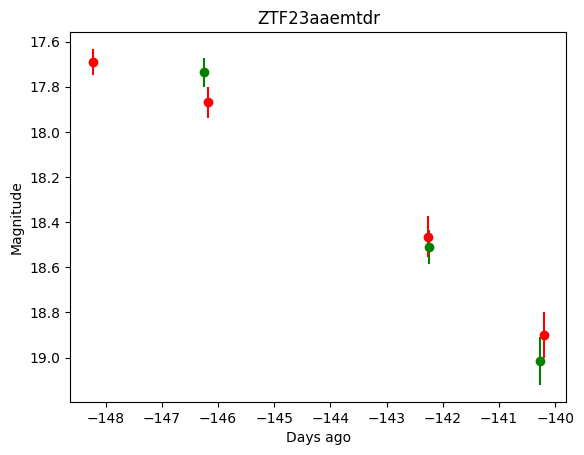

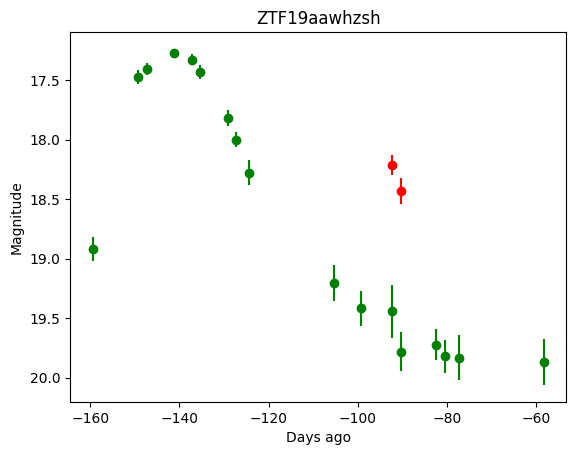

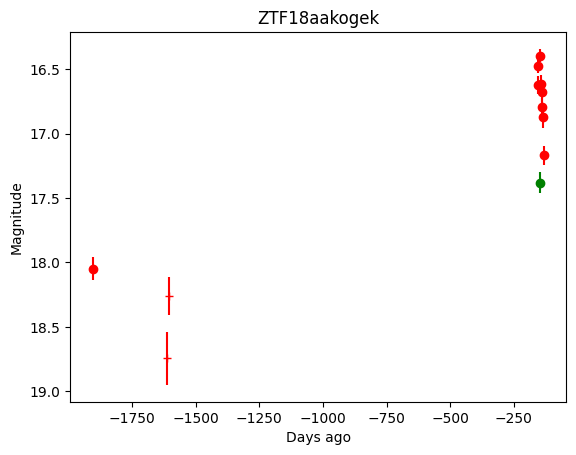

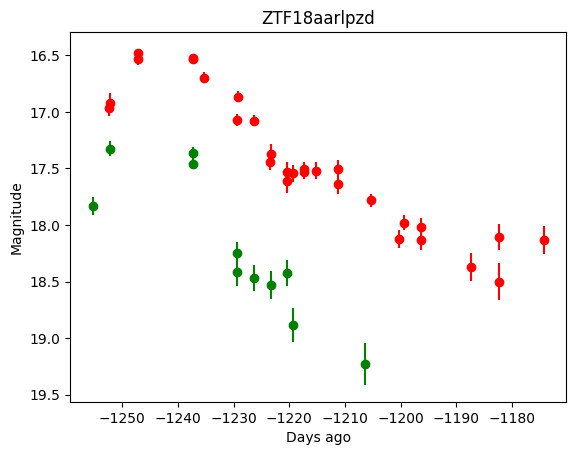

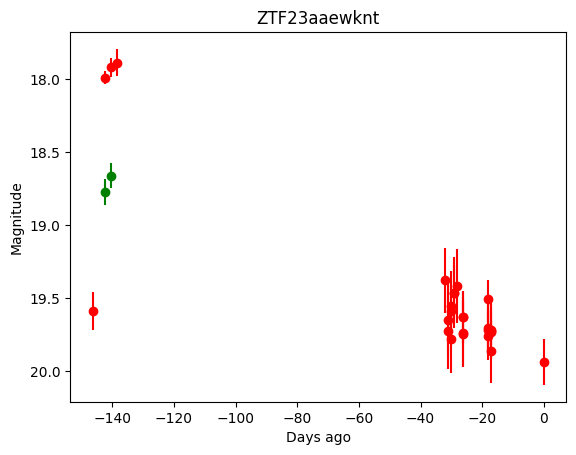

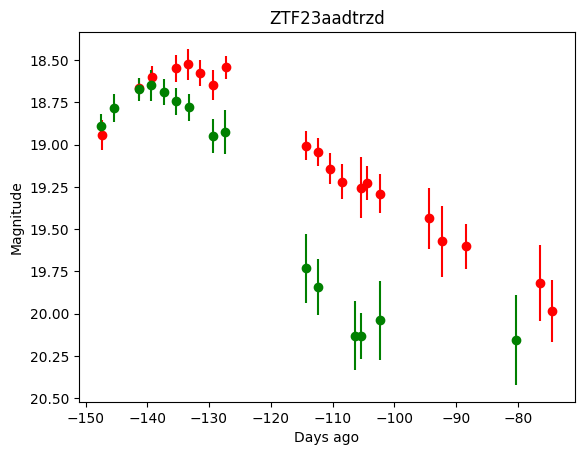

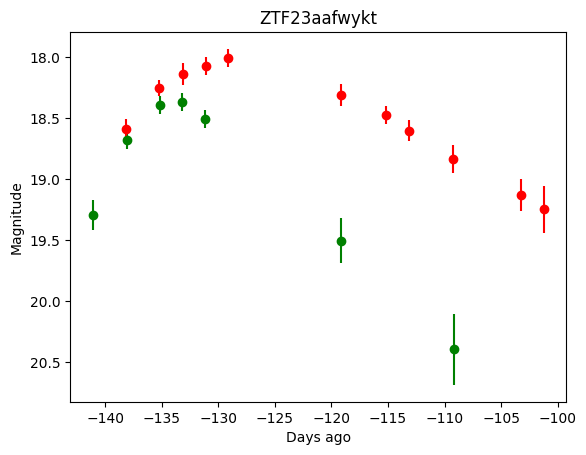

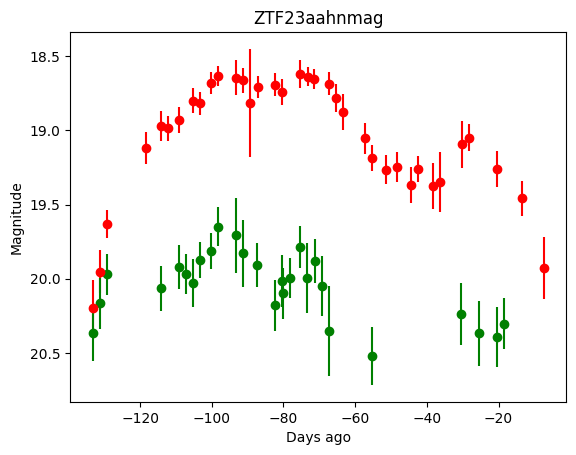

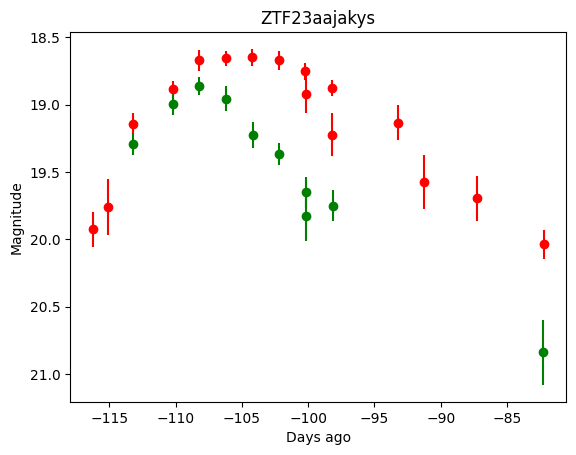

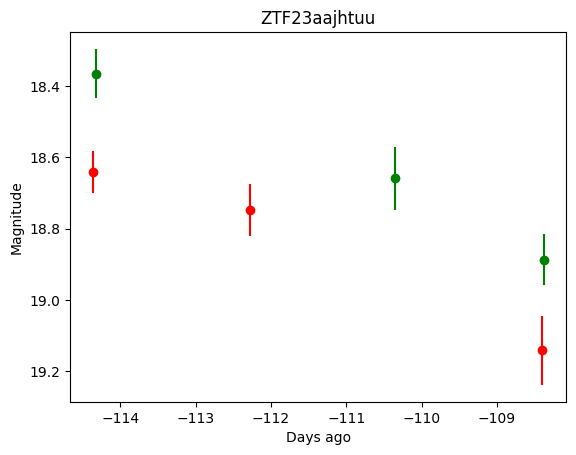

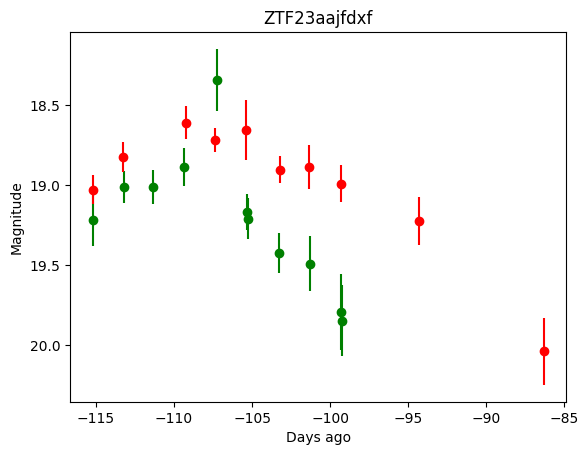

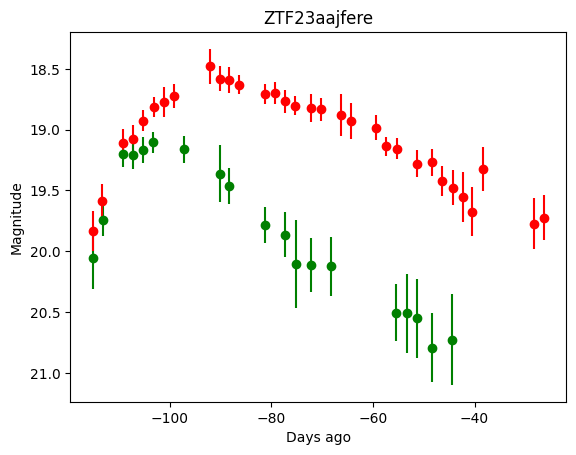

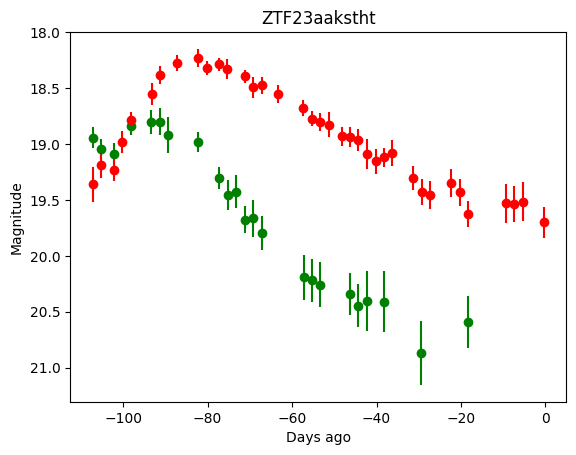

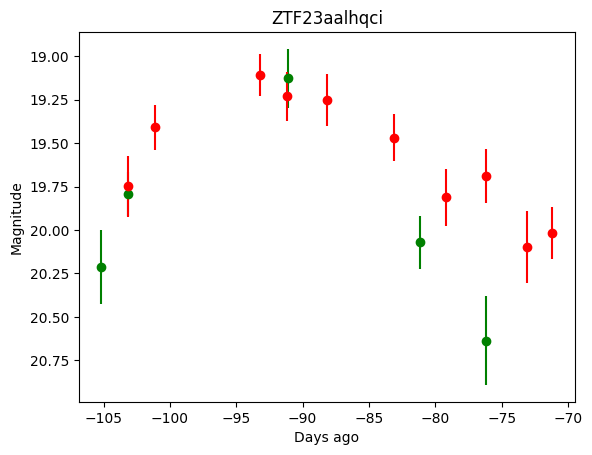

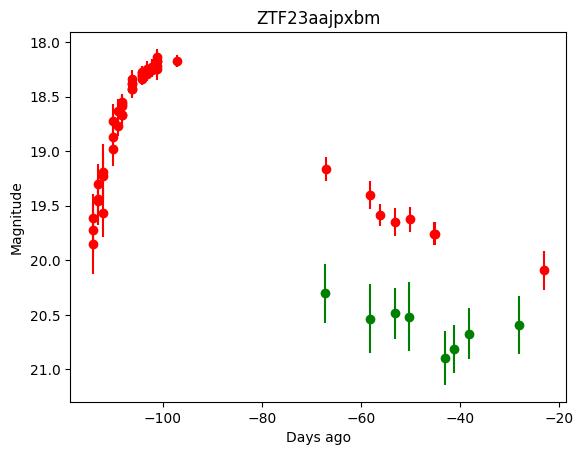

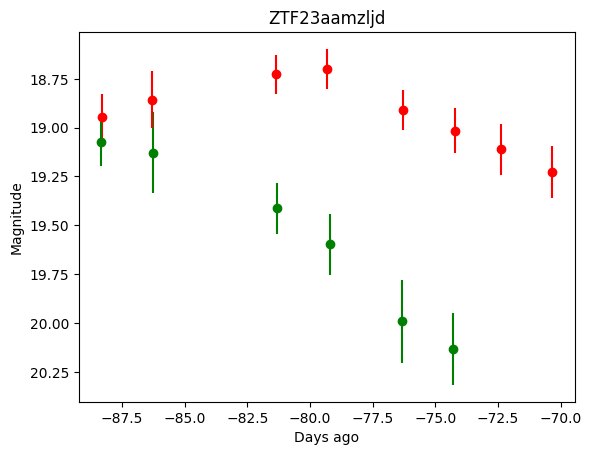

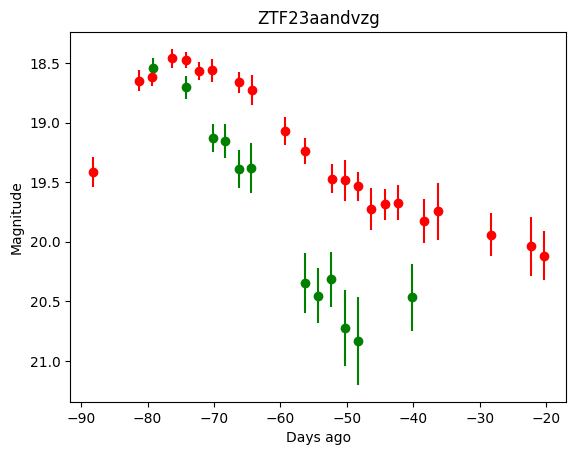

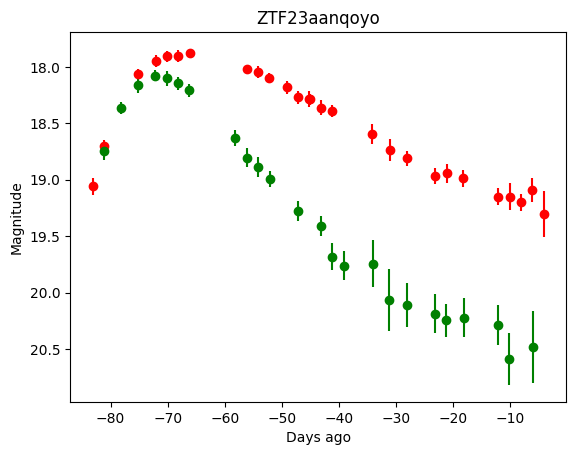

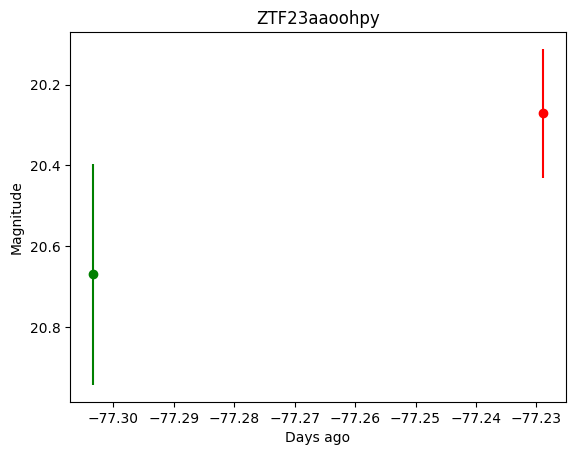

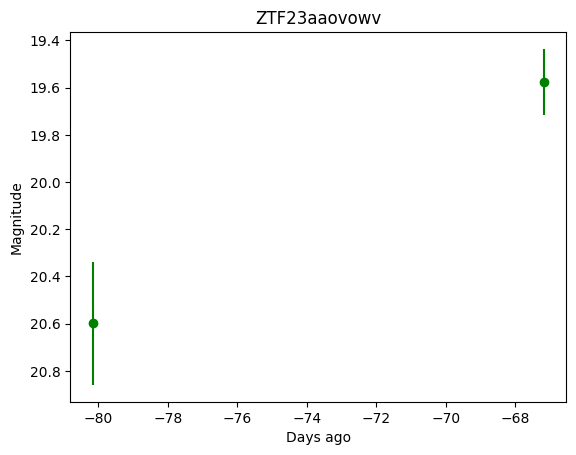

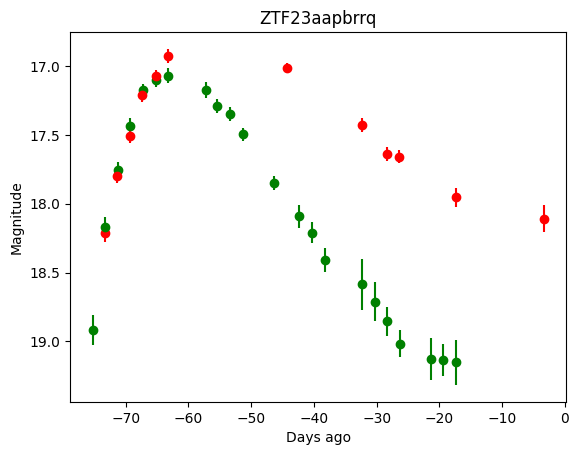

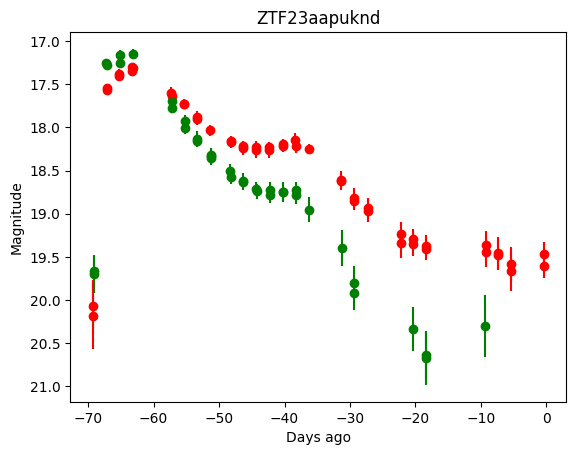

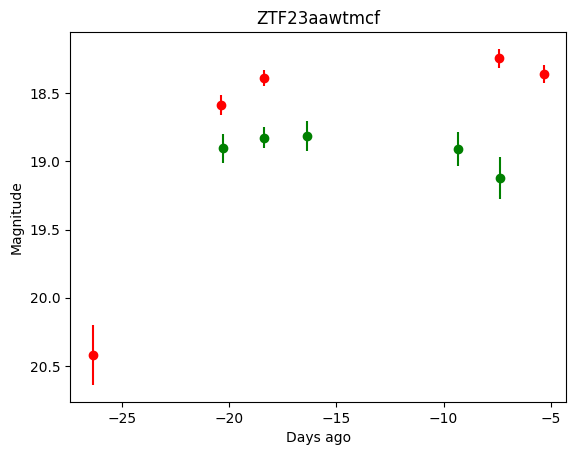

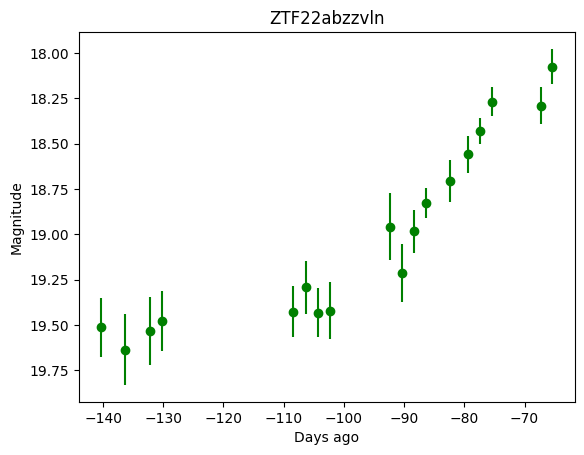

In [ ]:
objectList = [row['object'] for row in result]
response = L.objects(objectList)

# create a dictionary of lightcurves

lcsDict = {}
for obj in response:
    lcsDict[obj['objectId']] = {'candidates': obj['candidates']}

cols = {1:'g',2:'r'}

now = Time.now().jd

for obj in response:
    plt.figure()
    plt.subplot(111)
    for i in lcsDict[obj['objectId']]['candidates']:
        if 'isdiffpos' in i:
            if i['isdiffpos']=='t':
                plt.errorbar(i['jd']-now,i['magpsf'],i['sigmapsf'],fmt='o',color=cols[i['fid']])
            else:
                plt.errorbar(i['jd']-now,i['magpsf'],i['sigmapsf'],fmt='+',color=cols[i['fid']])


    plt.gca().invert_yaxis()
    plt.ylabel('Magnitude')
    plt.xlabel('Days ago')
    plt.title(obj['objectId'])
